<a href="https://colab.research.google.com/github/SaraSaponaro/segmentation_program/blob/master/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The txt files are in the folder named "txt":


*   *feature_reference.txt* (all set of reference features)
*   *feature_ML.txt* (subset of reference features, view abstract)
*   *feature_al.txt* (all set of our features)
*   *feature_al_ML.txt* (subset of our features, view abstract)





In [2]:
from google.colab import files 
uploaded = files.upload() 

Saving feature_al_ML.txt to feature_al_ML.txt


In this cell *mass* refers to our subset of features, while *mass_ref* refers to subset of reference features. 


In [0]:
import pandas as pd
mass = pd.read_table('feature_al_ML.txt', sep='\t', delim_whitespace=True, index_col=False, names=['filename ', 'classe', 'area'  ,'circularity', 'mu_NRL ' ,'std_NRL ', 'mu_VR','RLE ',' convexity ','std_I ' ,'kurtosis ','skewness'])
#mass_ref = pd.read_table('feature_ML.txt', sep='\t', delim_whitespace=True, index_col=False, names=['filename', 'classe', 'area', 'circ' ,'mu_NRL', 'std_NRL', 'E', 'conv', 'istd', 'kurt', 'sk'])
#print(mass_ref)
#print(mass_ref.groupby('classe').size())


In this cell we perform the scatter plot to see the correlation of the features. The diagonal of matrix shows the frequecy histograms.

Legend
1.   malignant mass
2.   benign mass 



In [0]:
import seaborn as sns 
sns.pairplot(mass.loc[:,'classe':'skewness'], hue='classe')

In this cell we perform PCA and then the scatter plot among principal components is shown. 

In [0]:
import seaborn as sns 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

#features = ['area', 'circ' ,'mu_NRL', 'std_NRL', 'E', 'conv', 'istd', 'kurt', 'sk']
features = ['area'  ,'circularity', 'mu_NRL ' ,'std_NRL ', 'mu_VR','RLE ',' convexity ','std_I ' ,'kurtosis ','skewness']
# Separating out the features
x = mass.loc[:, features].values
# Separating out the class
y = mass.loc[:,['classe']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10'])
#principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9'])

finalDf = pd.concat([mass[['classe']],principalDf], axis = 1)

sns.pairplot(finalDf.loc[:,'classe':'pc10'], hue='classe')

In this cell we create and trained the DDN using principal components as input. 

Using TensorFlow backend.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                132       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 12)                156       
_________________________________________________________________
dropout_2 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


I

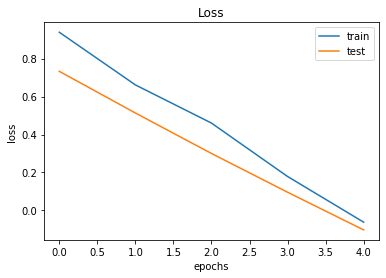

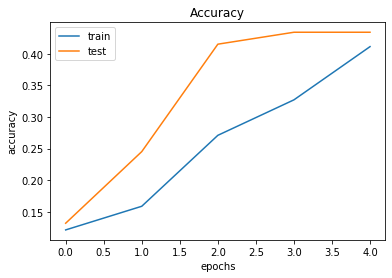

In [6]:
import numpy
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import StratifiedKFold

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
dataset=finalDf.loc[:, 'classe':'pc10'].values
#dataset=finalDf.loc[:, 'classe':'pc9'].values
X = dataset[:,1:]
Y = dataset[:,0]

# define n-fold cross validation test harness
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, Y):
    #create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, activation='relu'))     #model.add(Dense(12, input_dim=9, activation='relu'))
    model.add(Dropout(0.02))
    model.add(Dense(12, activation='relu'))
    model.add(Dropout(0.02))
    model.add(Dense(1, activation='sigmoid'))

    model.summary()

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    history=model.fit(X[train], Y[train],validation_data=(X[test], Y[test]), epochs=5, batch_size=7, verbose=0)

    scores = model.evaluate(X[test], Y[test], verbose=0)

    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

pyplot.figure(1)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.ylabel('loss')
pyplot.xlabel('epochs')
pyplot.figure(2)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.ylabel('accuracy')
pyplot.xlabel('epochs')
pyplot.show()


In this cell we trained the same DDN using features, without PCA. 

In [0]:
import numpy
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import StratifiedKFold

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
dataset = numpy.loadtxt('feature_al_ML.txt', delimiter='\t', usecols=(1,2,3,4,5,6,7,8,9,10,11))
X = dataset[:,1:]
Y = dataset[:,0]
# define 3-fold cross validation test harness
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, Y):

    model = Sequential()
    model.add(Dense(12, input_dim=10, activation='relu'))
    model.add(Dropout(0.02))
    model.add(Dense(12, activation='relu'))
    model.add(Dropout(0.02))
    model.add(Dense(1, activation='sigmoid'))

    model.summary()

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    history=model.fit(X[train], Y[train],validation_data=(X[test], Y[test]), epochs=6, batch_size=7, verbose=0)

    scores = model.evaluate(X[test], Y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

pyplot.figure(1)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

pyplot.figure(2)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

In this cell we draw ROC curve and compute the AUC. 

AUC = 0.5888746803069054


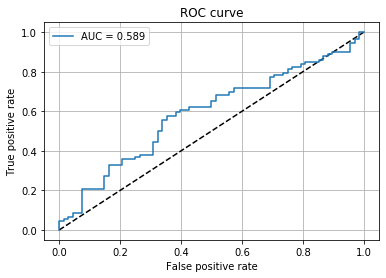

In [12]:
import pylab as plt
from sklearn.metrics import roc_curve, auc  

y_pred_keras = model.predict(X).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y, y_pred_keras, pos_label=2)
auc_keras = auc(fpr_keras, tpr_keras)
print('AUC =',auc_keras)
#print('fpr',fpr_keras)
#print('tpr',tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='AUC = {:.3f}'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.grid()
plt.show()